In [1]:
from dcv.simulation_utils import *

In [2]:
with h5py.File('data/split.hdf5', 'r') as f:
    train_list = f['train'][:]
    test_list = f['test'][:]
    
N = 10
inds = np.random.permutation(np.arange(train_list.shape[0]))[:N]
train_list = [train_list[ind].decode() for ind in inds]
inds = np.random.permutation(np.arange(test_list.shape[0]))[:N]
test_list = [test_list[ind].decode() for ind in inds]

0 trial:  1


/home/jung-su/miniconda3/envs/torchSource/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


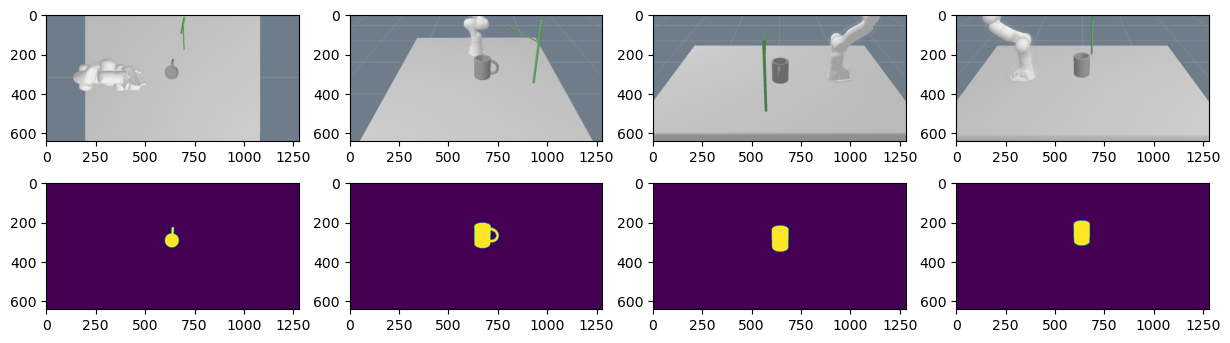

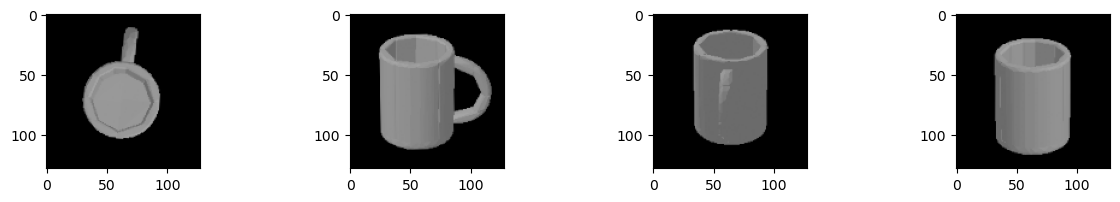

0 success!
1 trial:  1


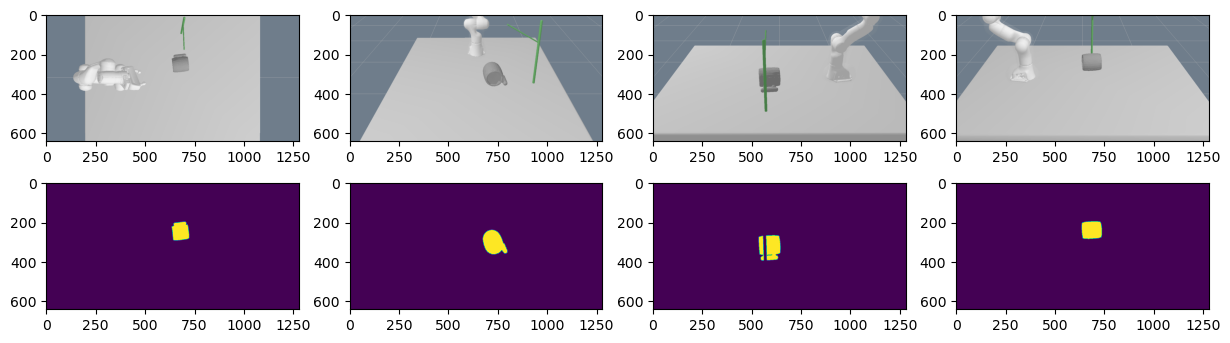

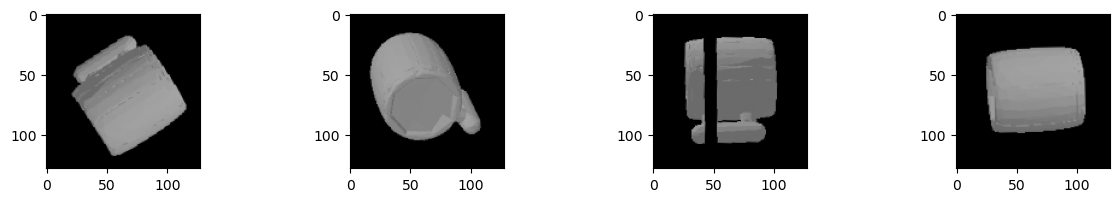

1 trial:  2


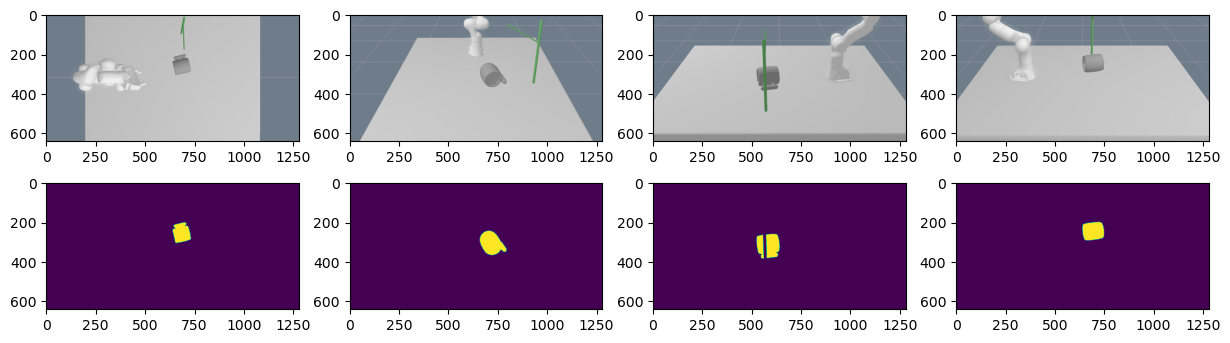

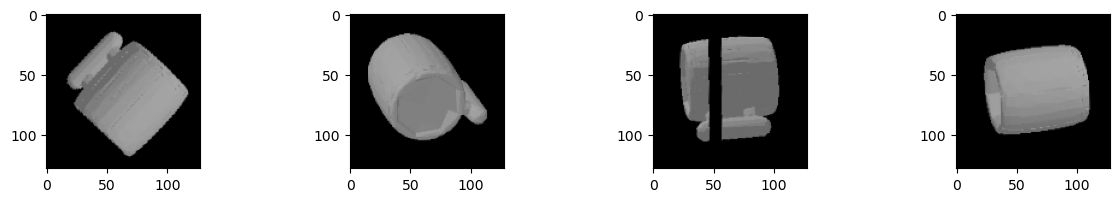

1 trial:  3


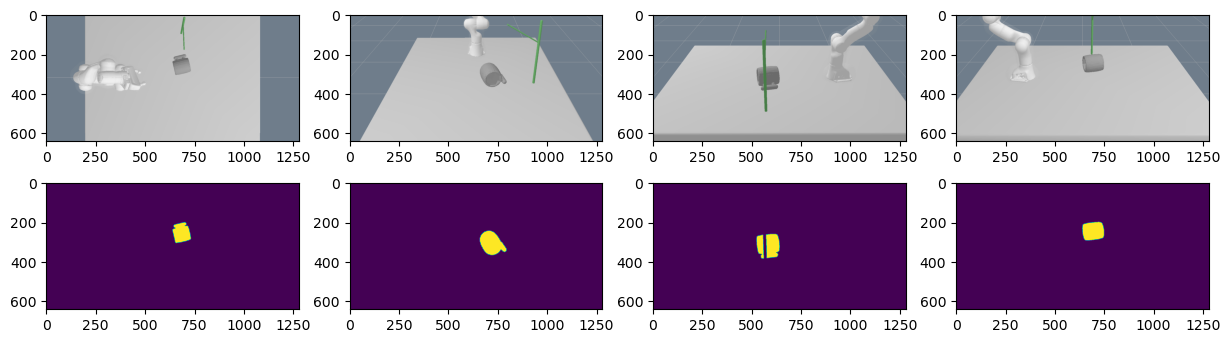

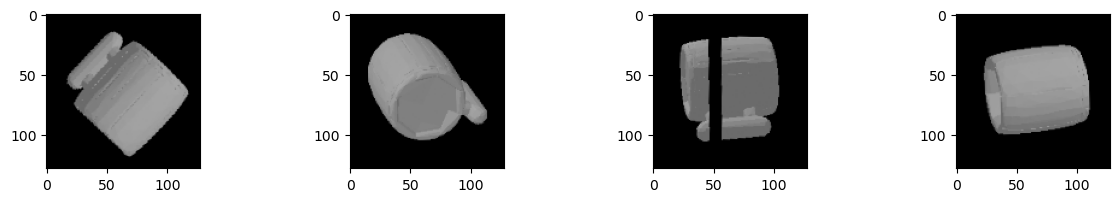

1 trial:  4


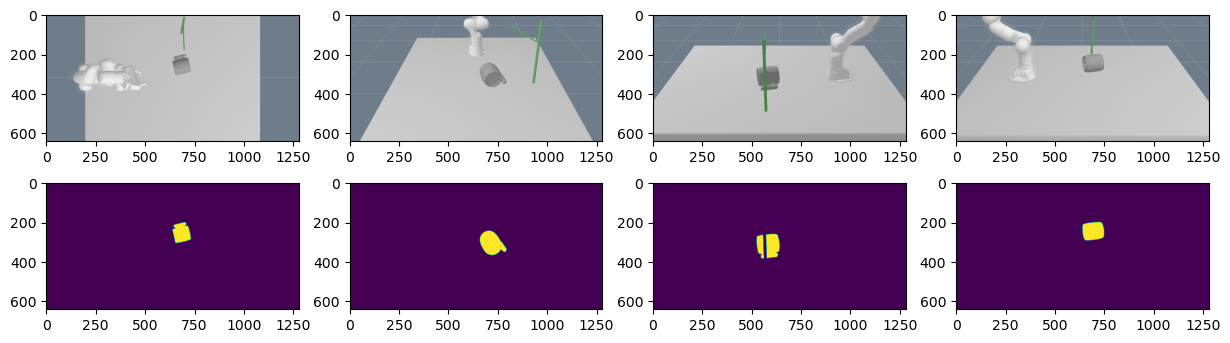

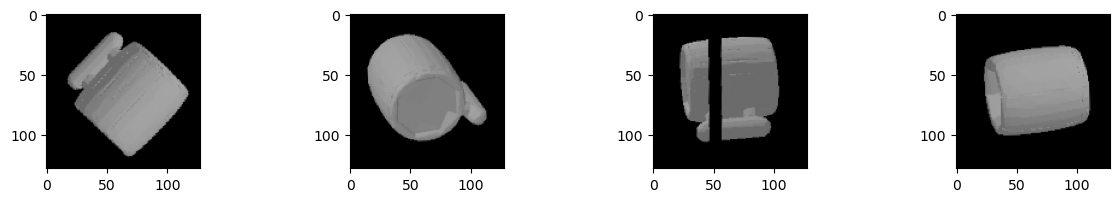

1 failed!
2 trial:  1


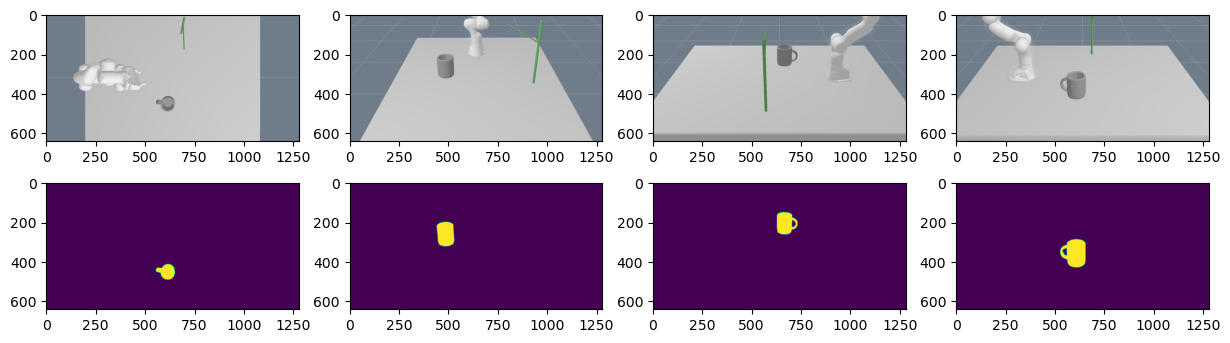

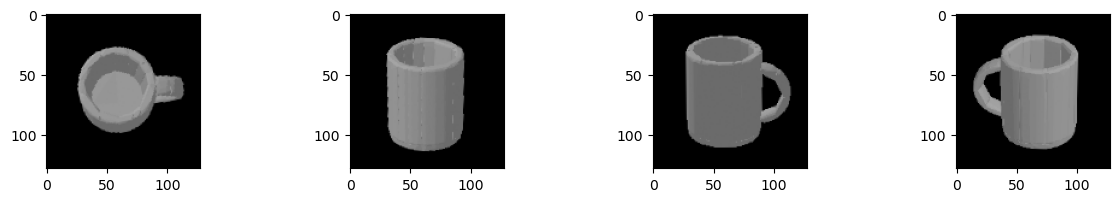

2 success!
3 trial:  1


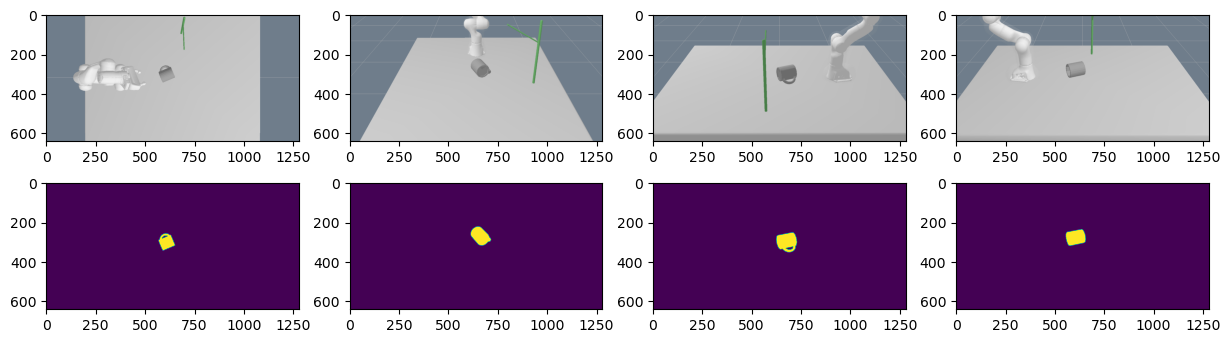

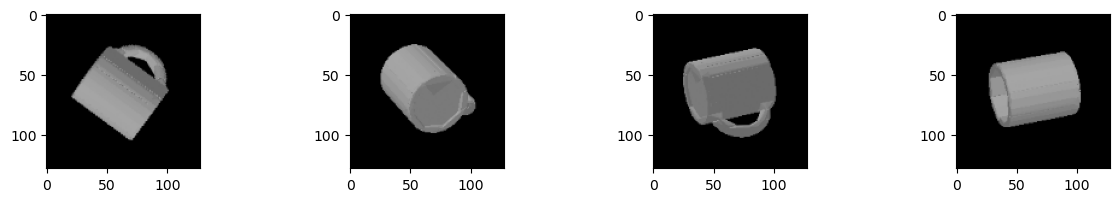

3 trial:  2


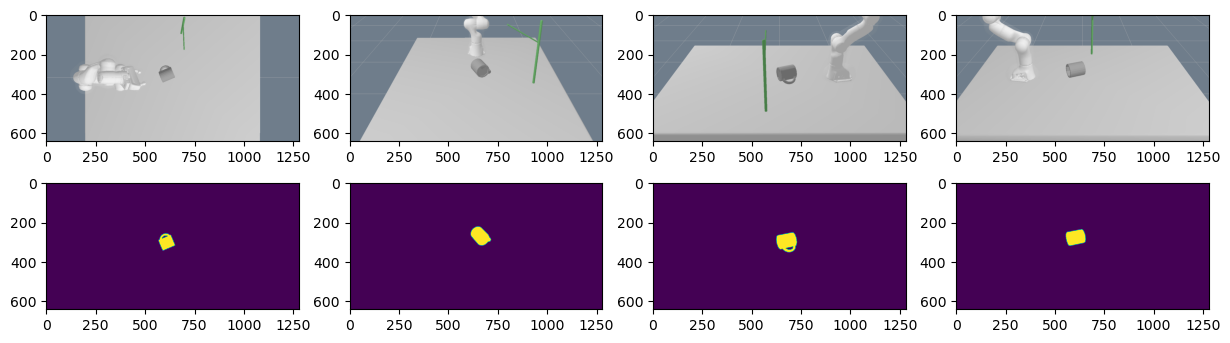

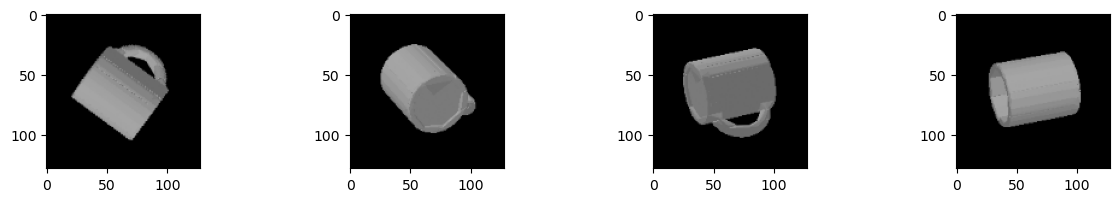

3 trial:  3


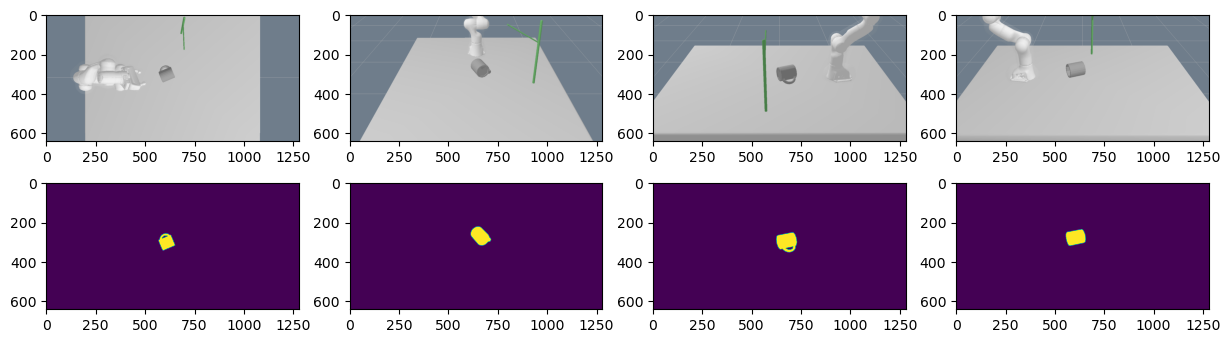

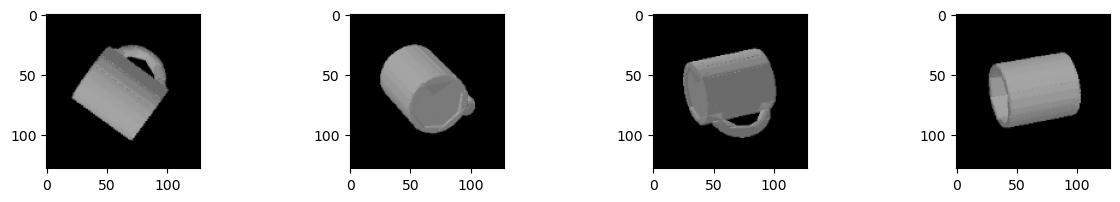

3 trial:  4


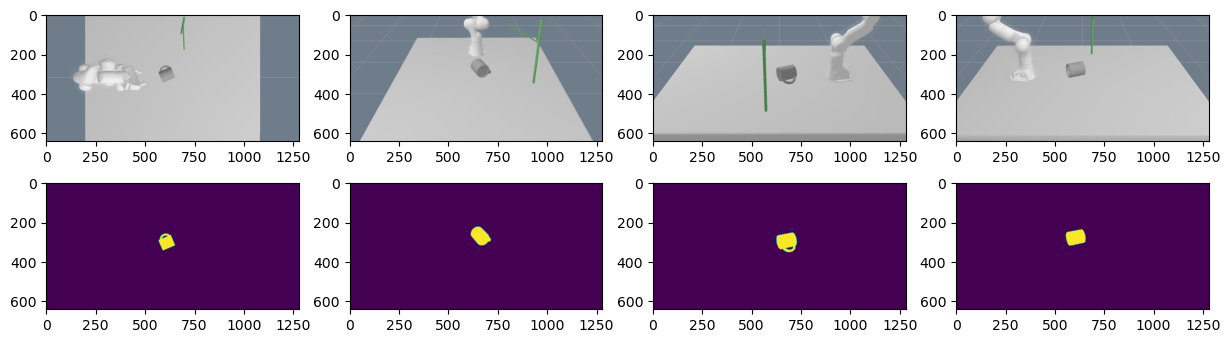

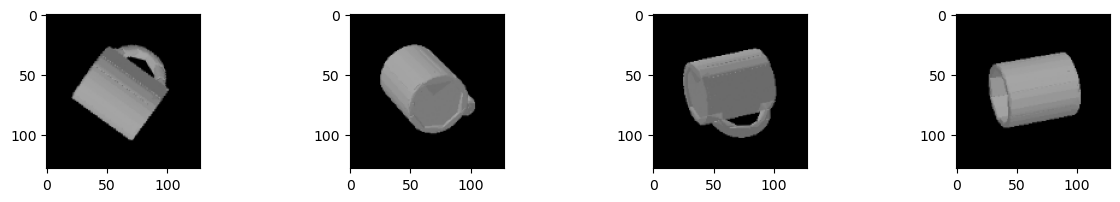

3 failed!
4 trial:  1


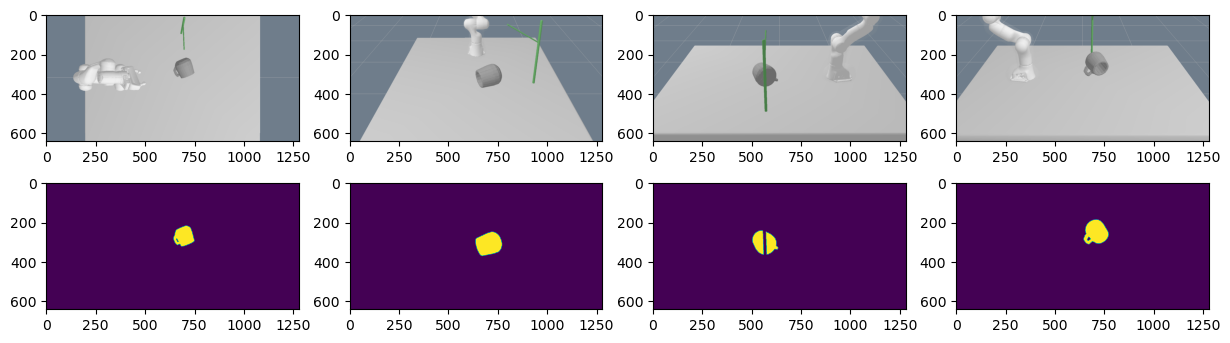

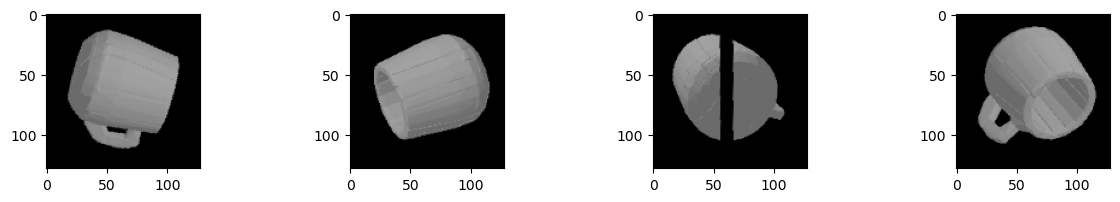

4 trial:  2


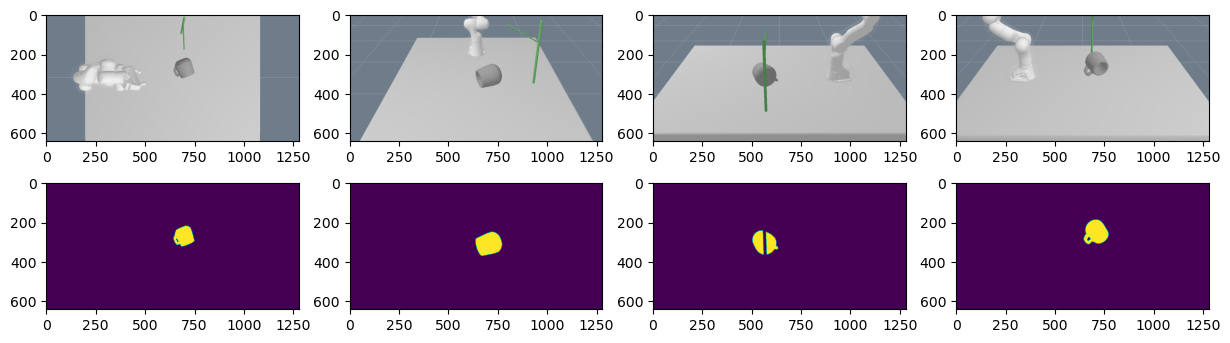

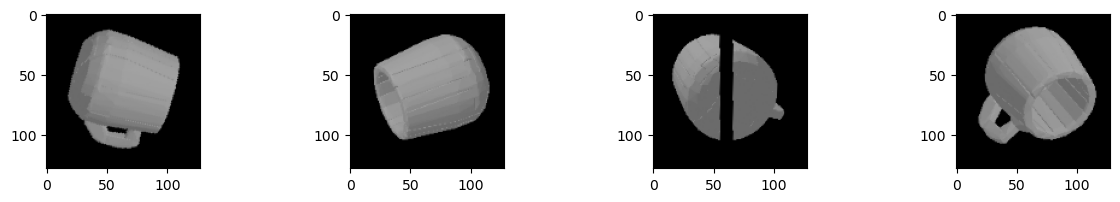

4 trial:  3


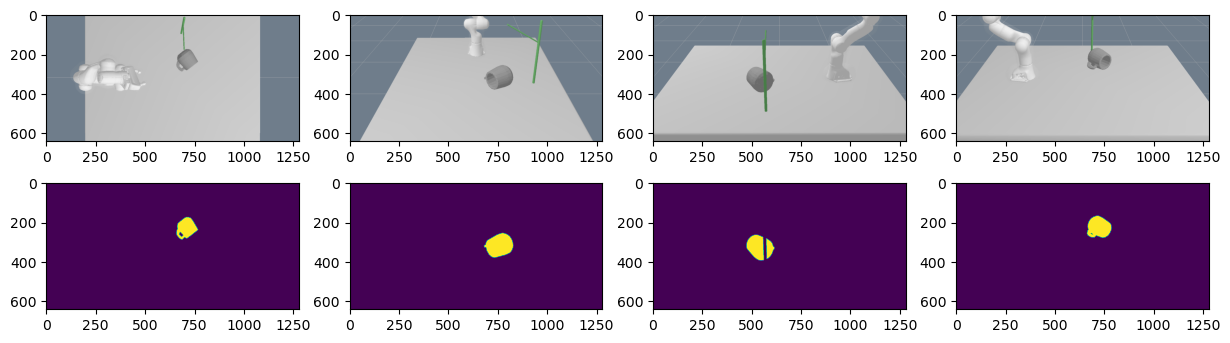

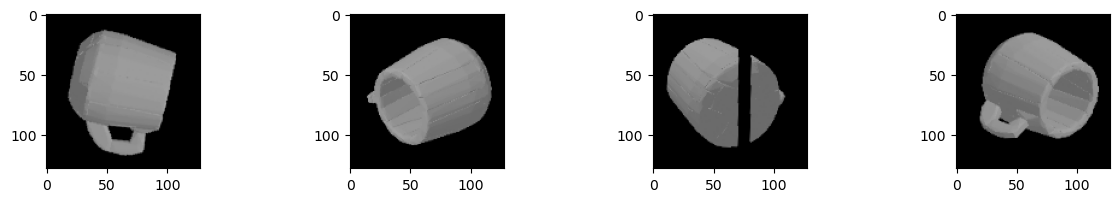

4 trial:  4


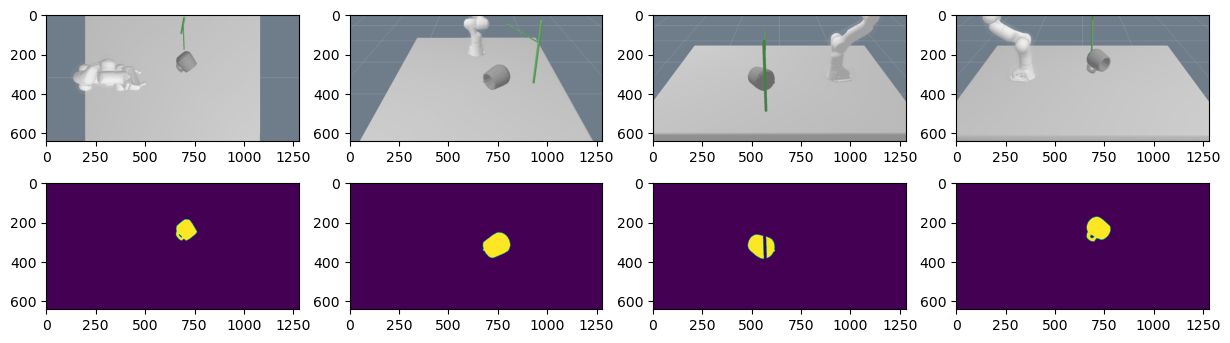

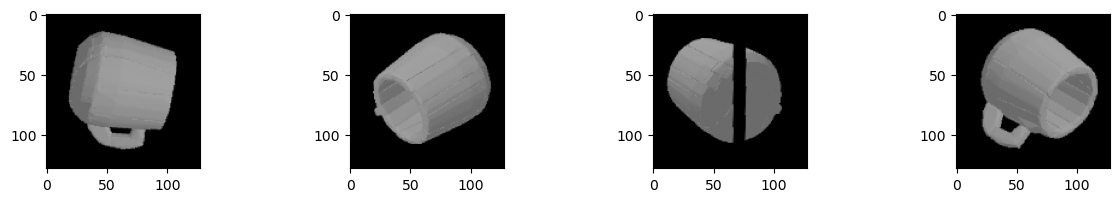

4 failed!
5 trial:  1


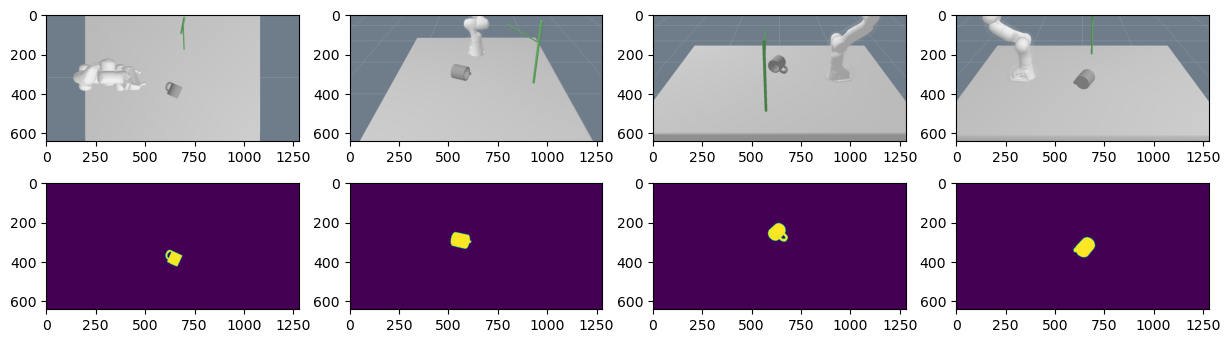

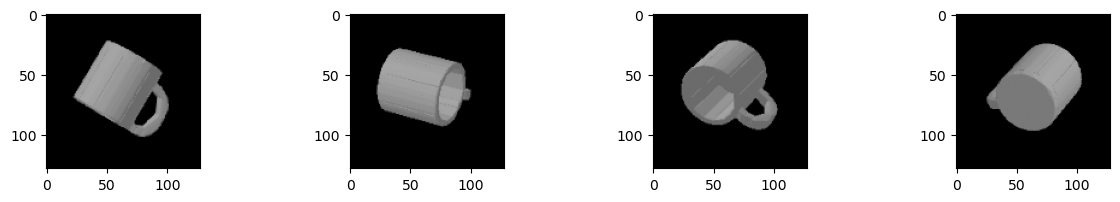

In [ ]:
mug_inds = np.zeros(N)
mug_poses = np.zeros((N,7))
trajs = np.zeros((N,80,7))
traj_lengths = np.zeros(N)
successes = np.zeros(N)
num_restarts = np.zeros(N)

for i, filename in enumerate(train_list):
    mug_ind = sorted(os.listdir('../dataGeneration_vF/data/meshes_coll')).index(filename)
    
    while True:
        mug_pos = np.random.randn(3)*.1
        mug_pos[2] = 1.2
        mug_quat = np.random.randn(4)
        mug_pose = np.hstack([mug_pos, mug_quat/np.linalg.norm(mug_quat)])
        S = Simulation("world.g", [mug_ind], [mug_pose], sort=True, verbose=1, addImp=True)
        if S.getMugPosition(mug_ind)[0] < 0.2:
            break

    C = Configuration("world.g", exp_name='PIFO_best', mug_inds=[mug_ind], view=False)
    num_failures = 0
    failed = False
    traj_tmp = np.empty((0,7))

    while True:
        while True:
            print(i, 'trial: ', num_failures+1)
            C.setJointState(S.get_q())
            out = S.takePicture([mug_ind])
            C.updatePIFO([mug_ind], *out[2:])
            Skeleton = [["grasp", "", mug_ind], 
                        ["hang", "", mug_ind]]
            traj, komo = C.solveKOMO(Skeleton, verbose=1)
            S.executeTrajectory(traj[:10])
            traj_tmp = np.concatenate([traj_tmp, traj[:10]], axis=0)
            grasped = S.closeGripper(mug_ind)
            if grasped:
                break
            S.openGripper()
            S.goingBack(1.)
            num_failures += 1
            if num_failures > 3:
                failed = True
                print(i, 'failed!')
                break

        if failed: break
        S.executeTrajectory(traj[10:])
        traj_tmp = np.concatenate([traj_tmp, traj[10:]], axis=0)
        S.openGripper()
        S.stepNone(.3)
        S.goingBack(1.)
        S.stepNone(2.)
        if S.isHung(mug_ind):
            print(i, 'success!')
            break
        else:
            num_failures += 1
            if num_failures > 3:
                print(i, 'failed!')
                failed = True
                break
                
    mug_inds[i] = mug_ind 
    mug_poses[i] = mug_pose
    traj_lengths[i] = traj_tmp.shape[0]
    trajs[i,:traj_tmp.shape[0]] = traj_tmp
    successes[i] = not failed
    num_restarts[i] = num_failures
        
# with h5py.File('eval/LGP/train_new.hdf5', 'w') as f:
#     f.create_dataset("mug_inds", data=mug_inds)
#     f.create_dataset("mug_poses", data=mug_poses)
#     f.create_dataset("trajs", data=trajs)
#     f.create_dataset("traj_lengths", data=traj_lengths)
#     f.create_dataset("successes", data=successes)
#     f.create_dataset("num_restarts", data=num_restarts)
    

0 trial:  1


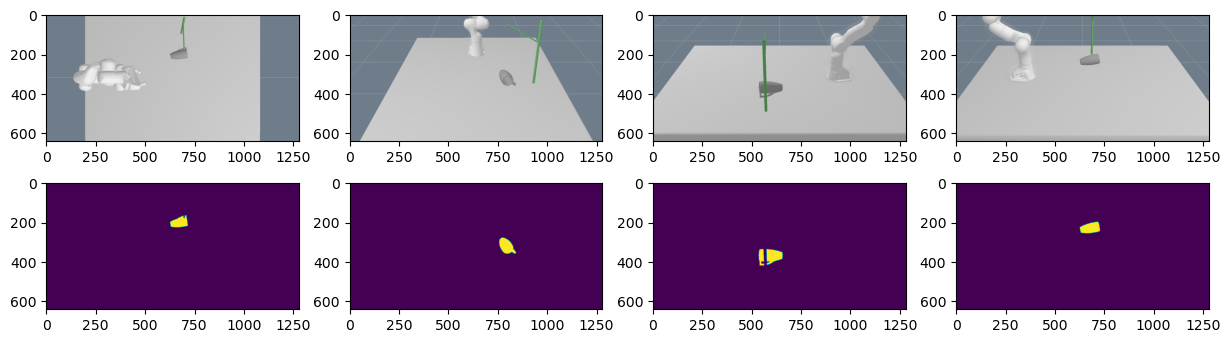

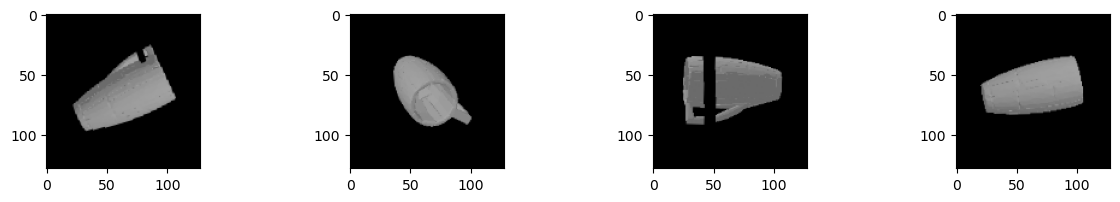

0 trial:  2


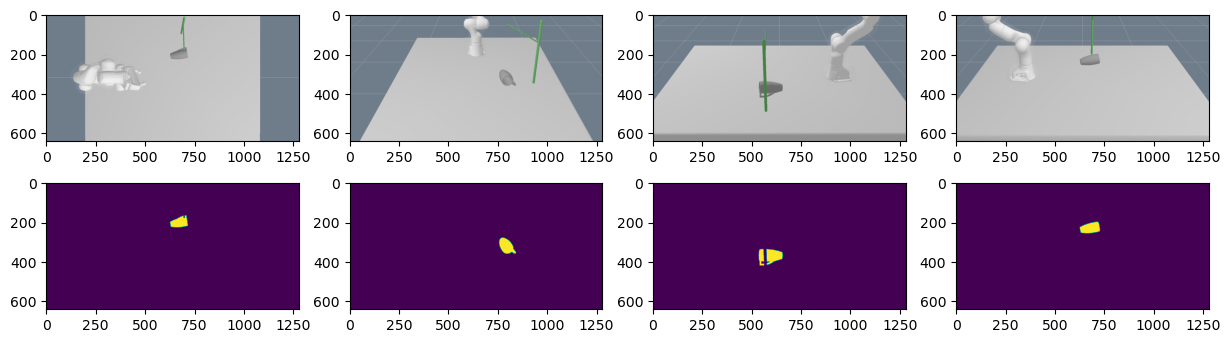

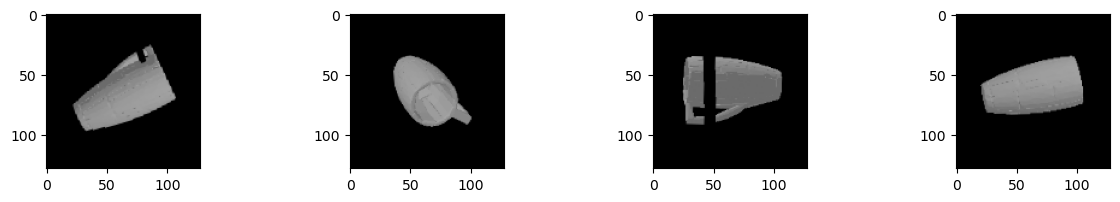

0 trial:  3


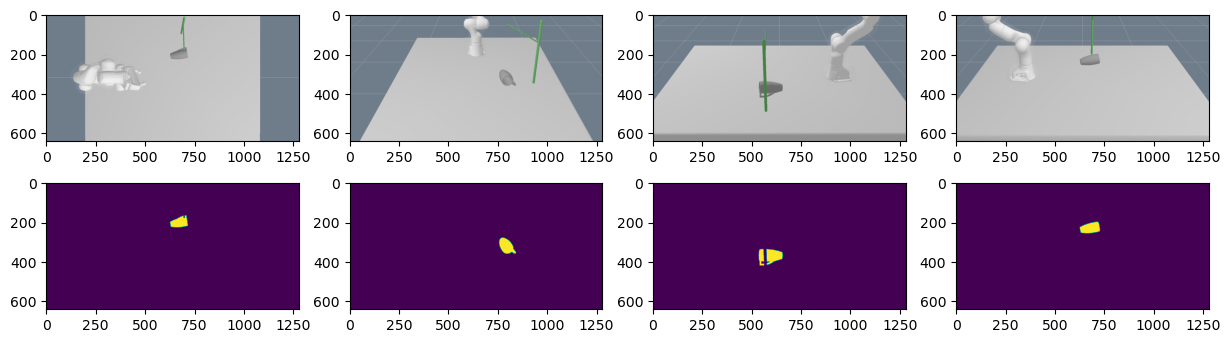

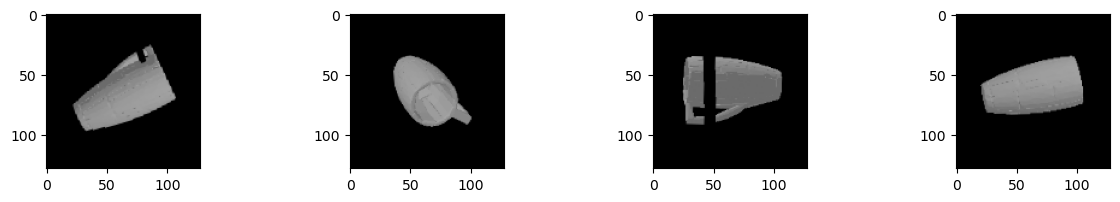

0 trial:  4


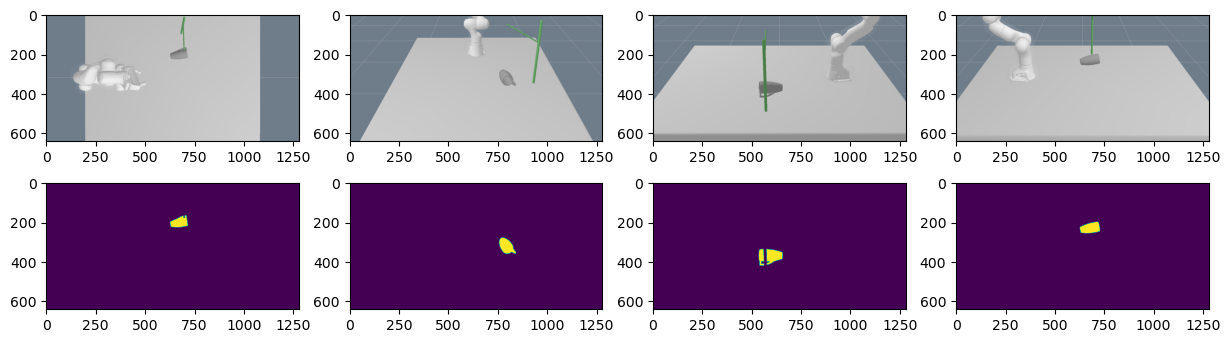

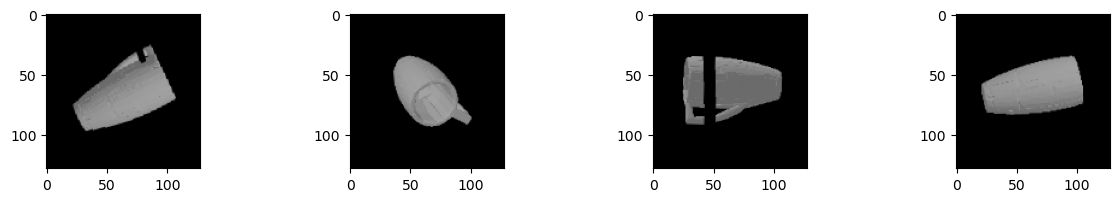

0 failed!
1 trial:  1


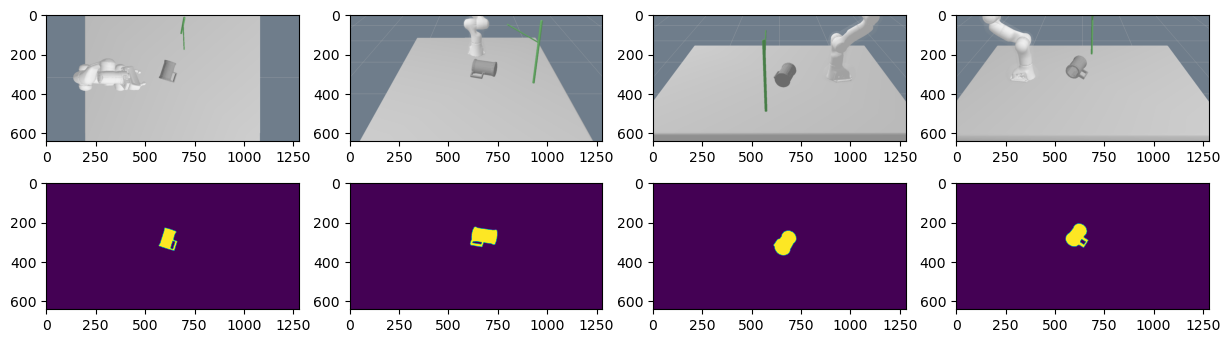

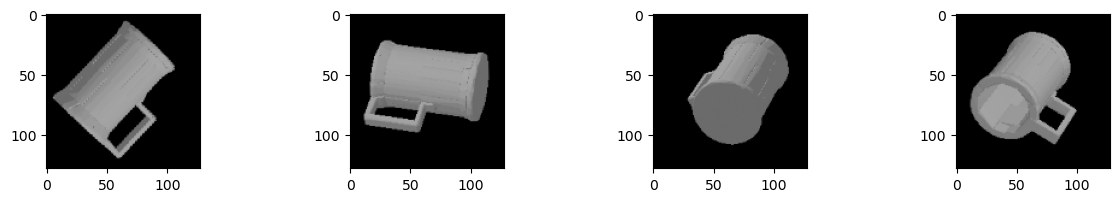

1 success!
2 trial:  1


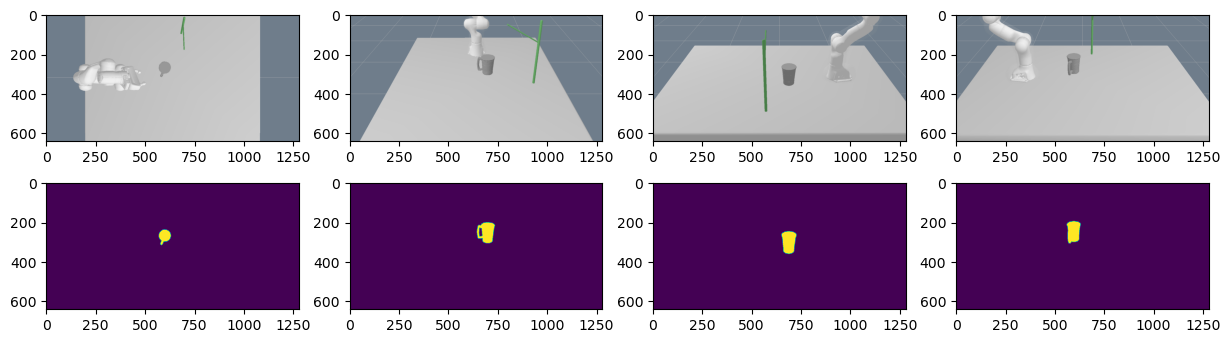

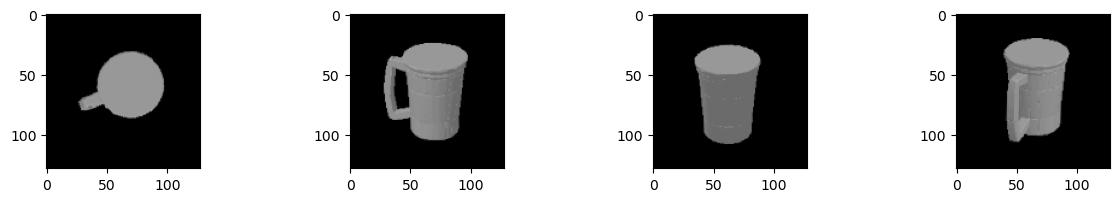

2 trial:  2


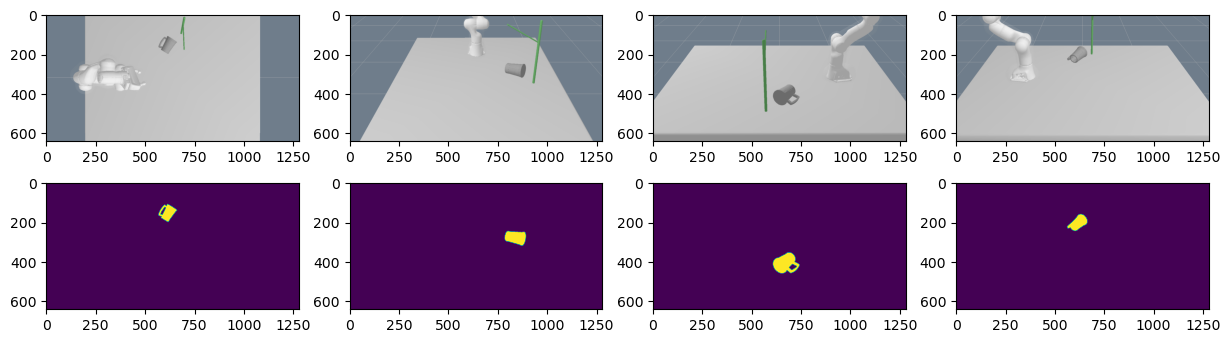

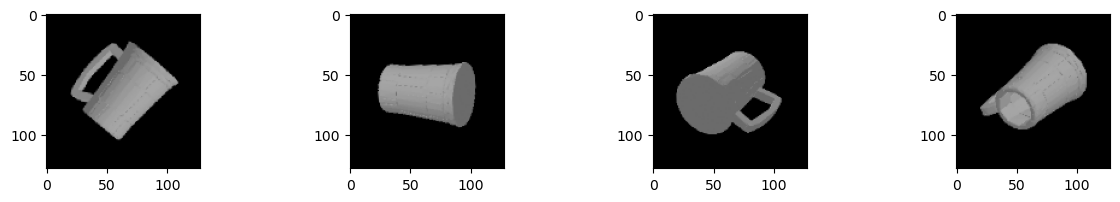

2 trial:  3


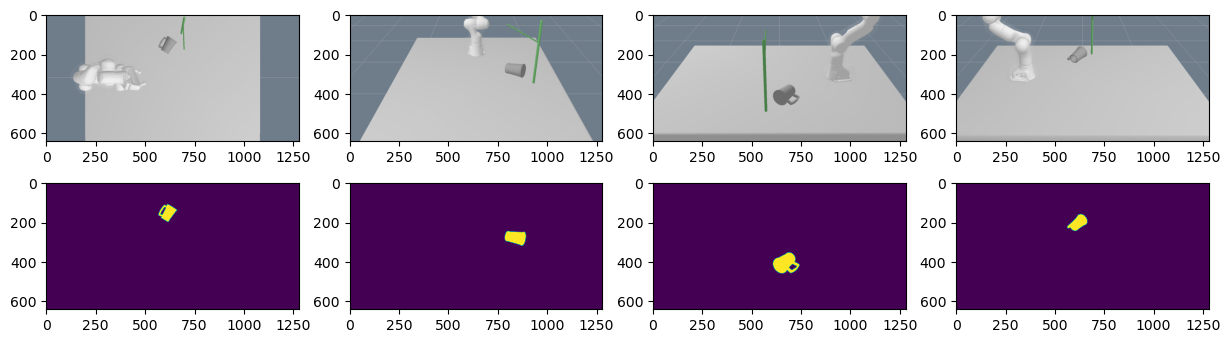

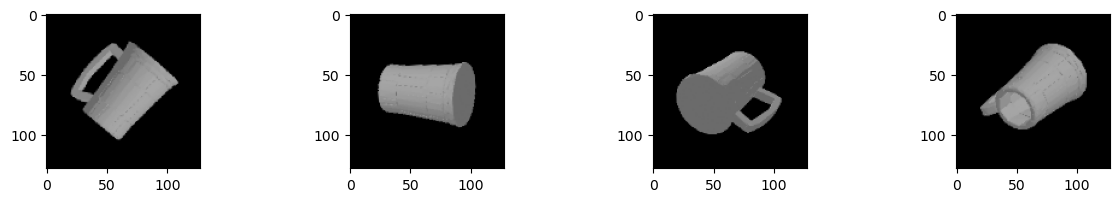

2 trial:  4


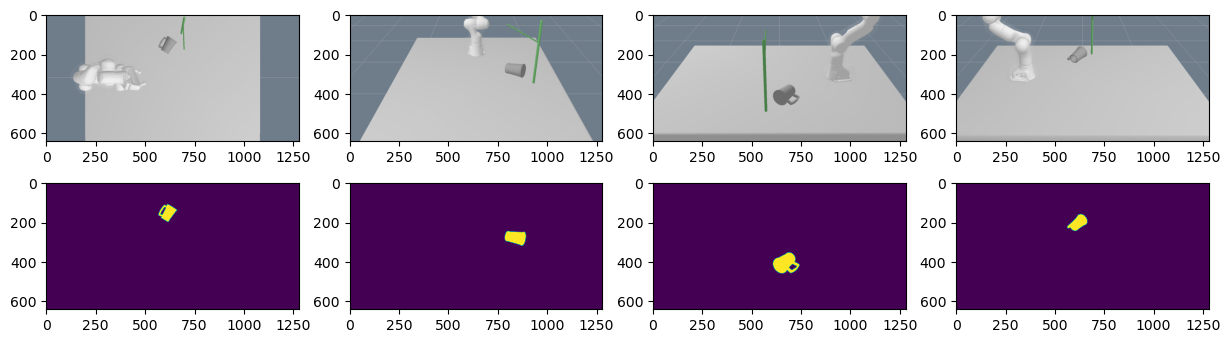

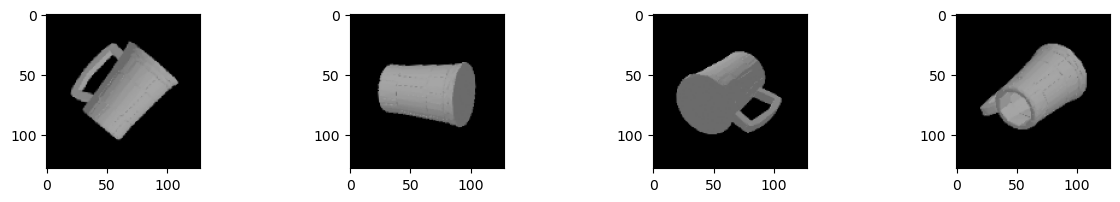

2 failed!
3 trial:  1


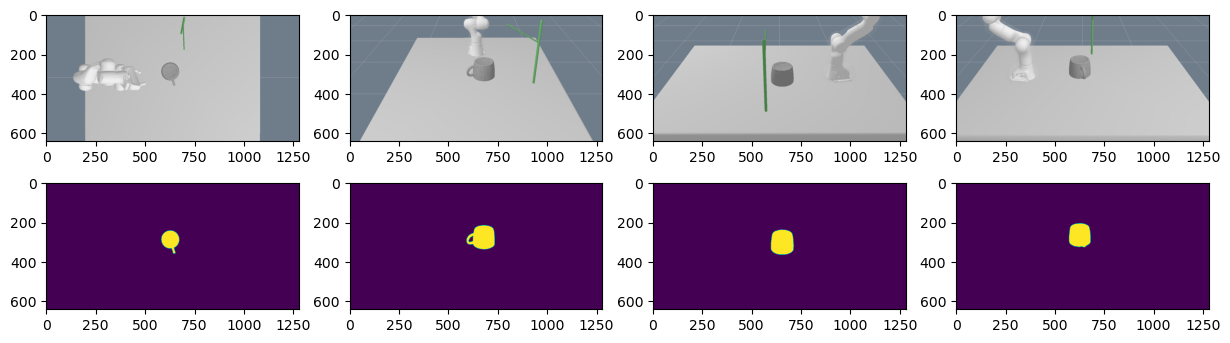

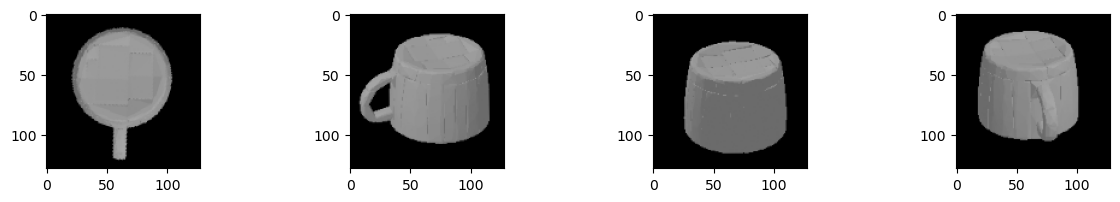

3 trial:  2


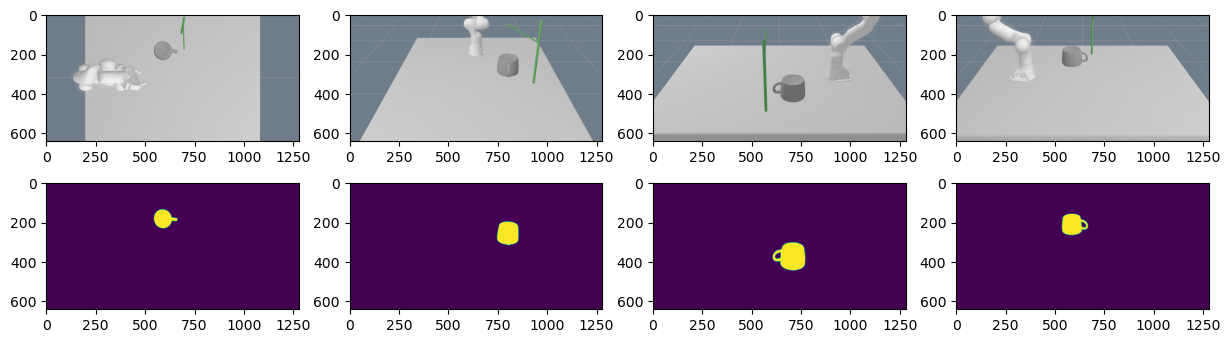

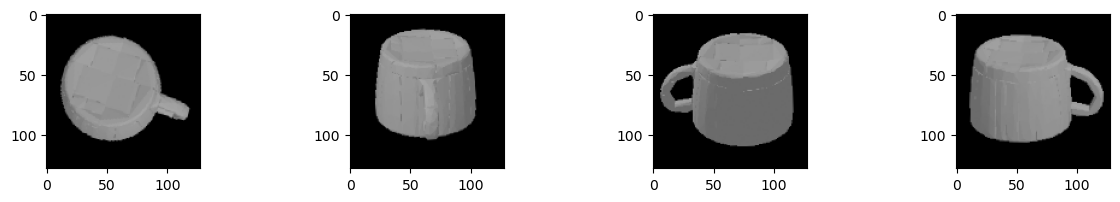

3 trial:  3


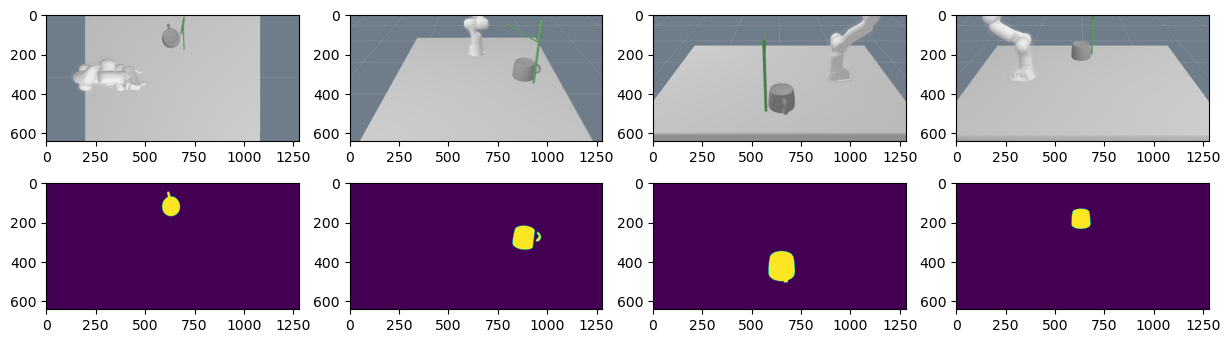

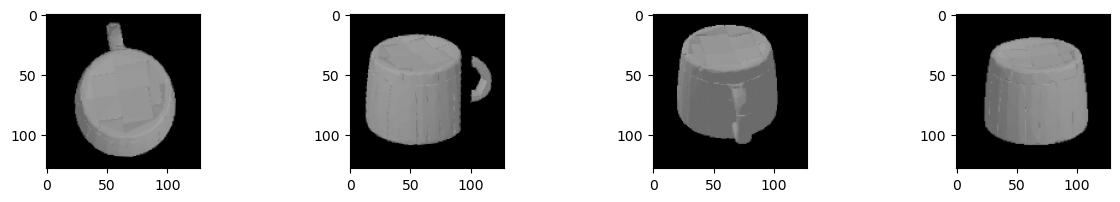

3 trial:  4


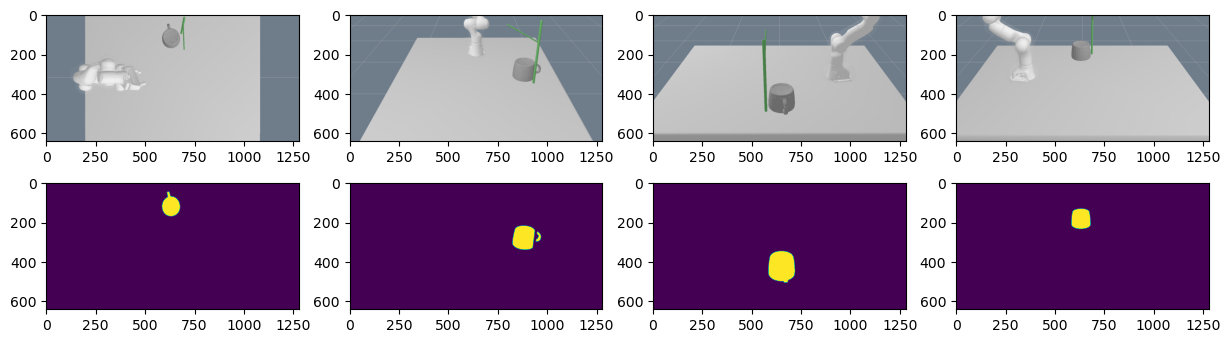

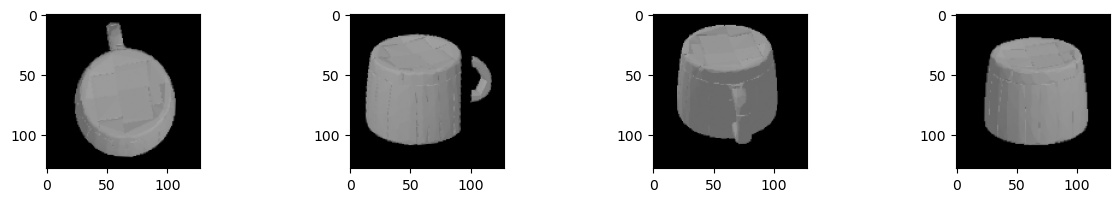

3 failed!
4 trial:  1


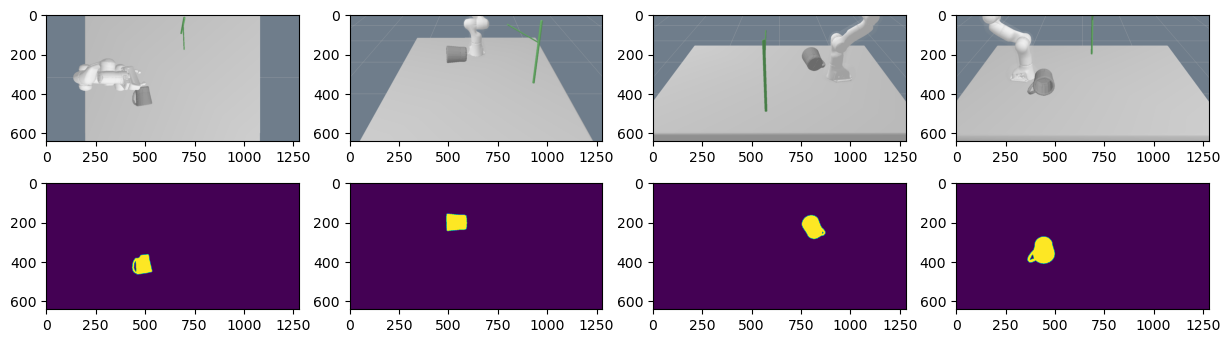

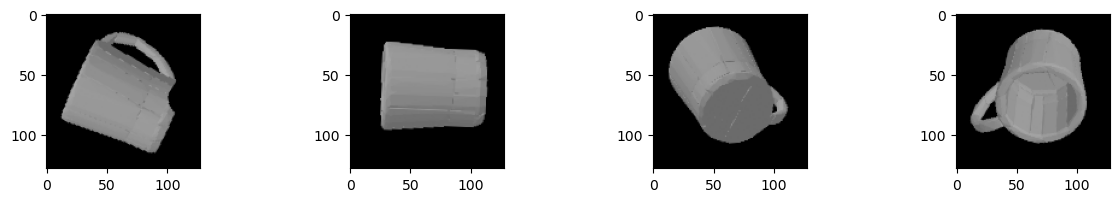

4 trial:  2


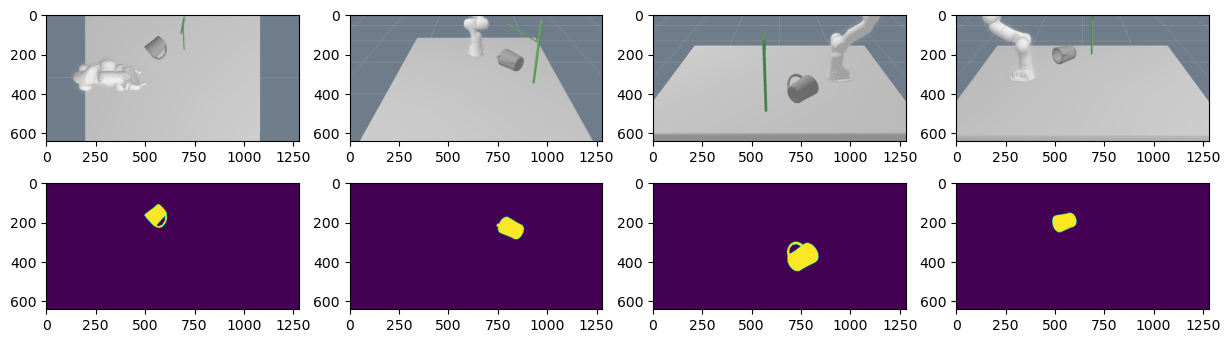

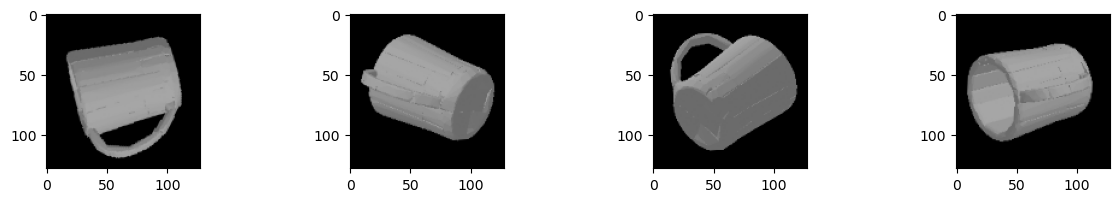

4 trial:  3


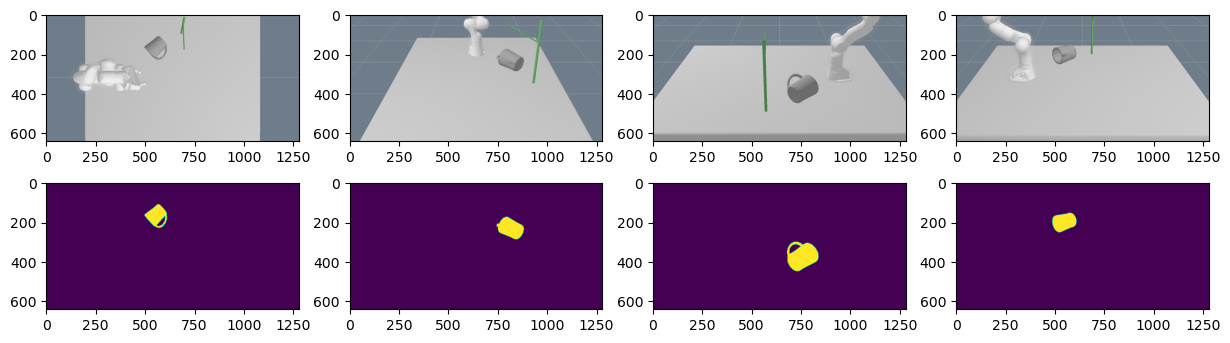

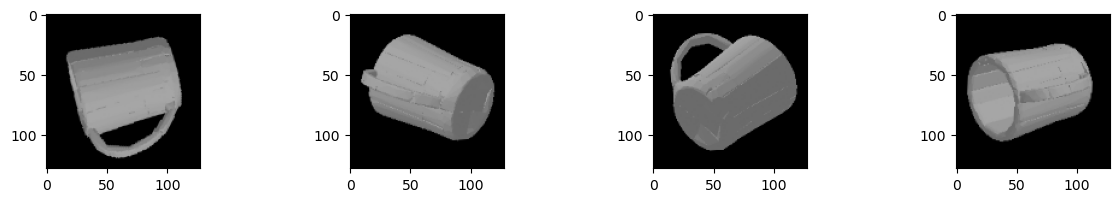

4 trial:  4


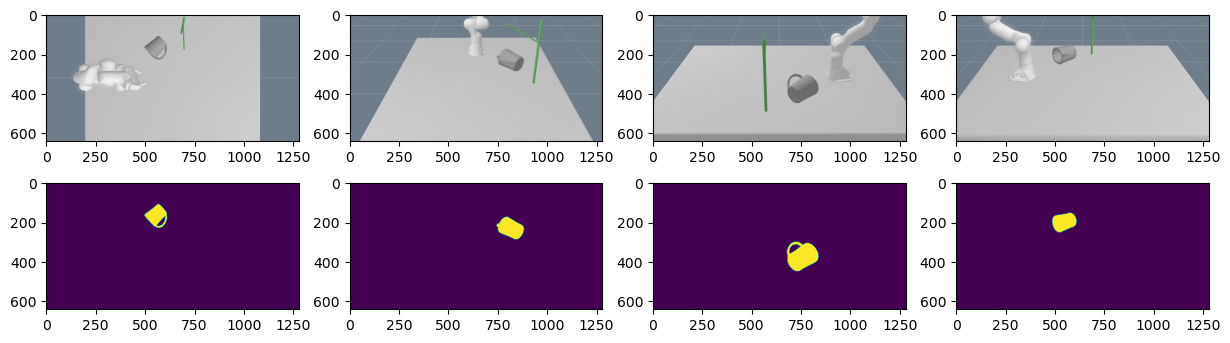

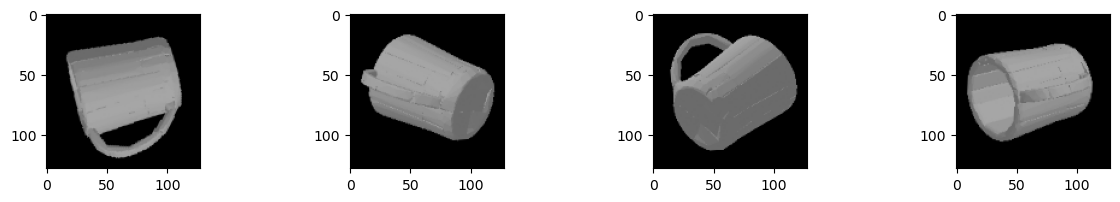

4 success!
5 trial:  1


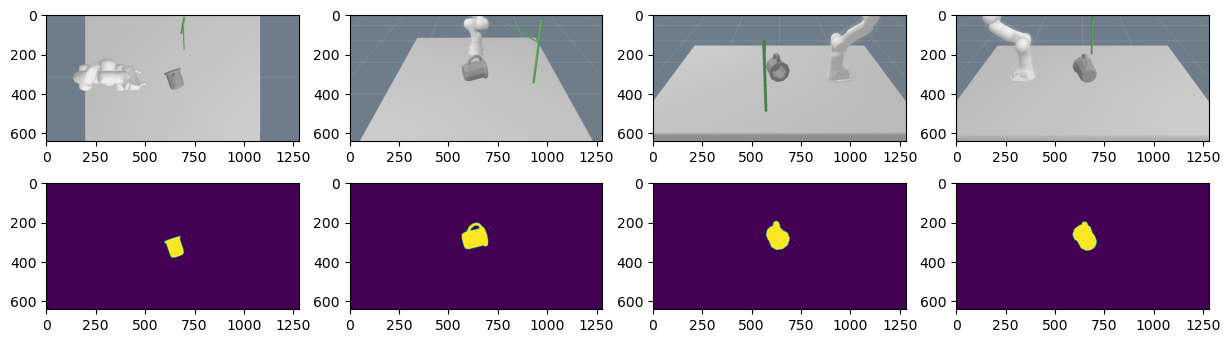

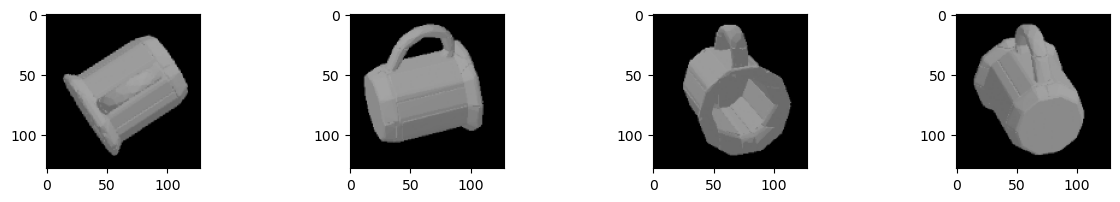

5 trial:  2


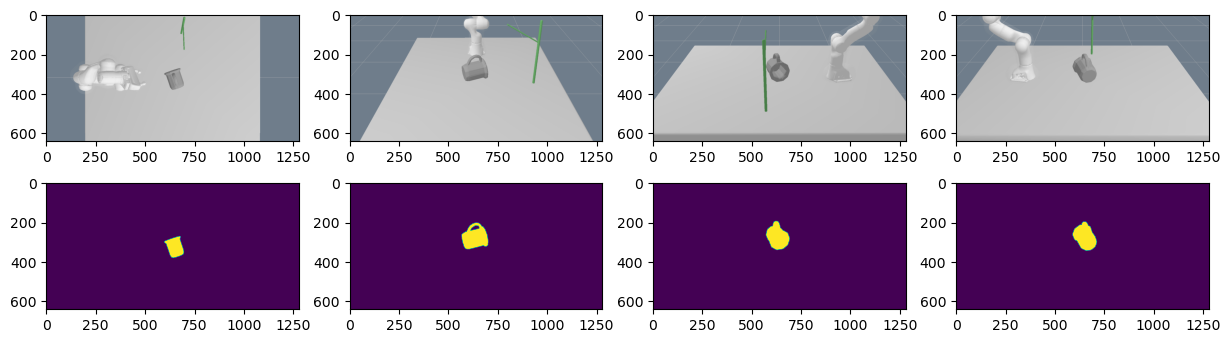

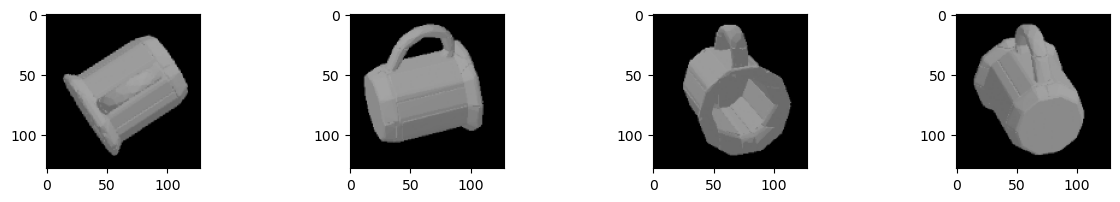

5 success!
6 trial:  1


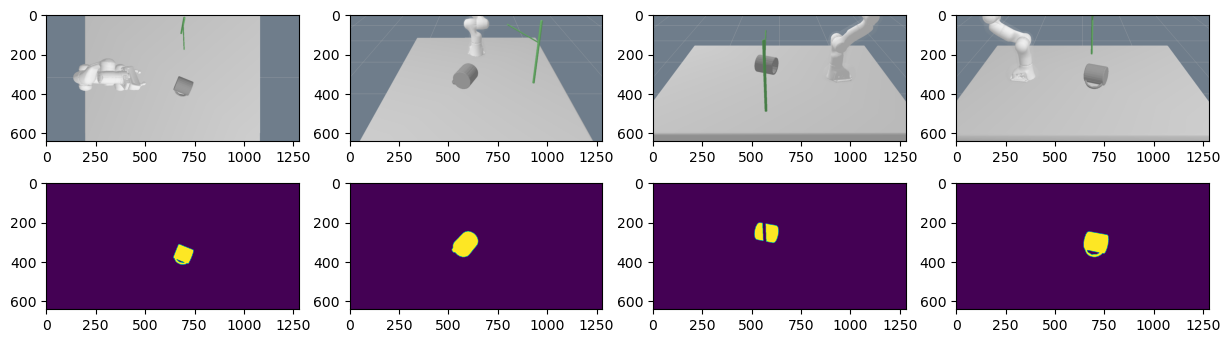

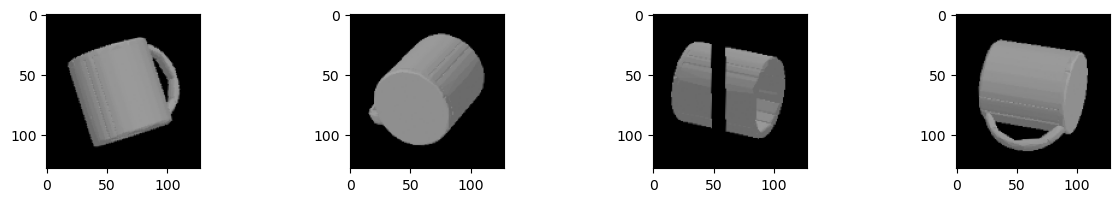

6 success!
7 trial:  1


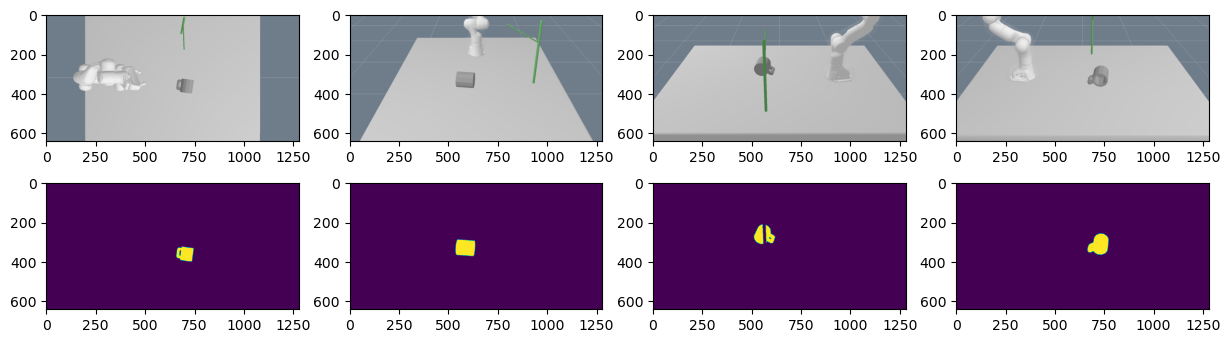

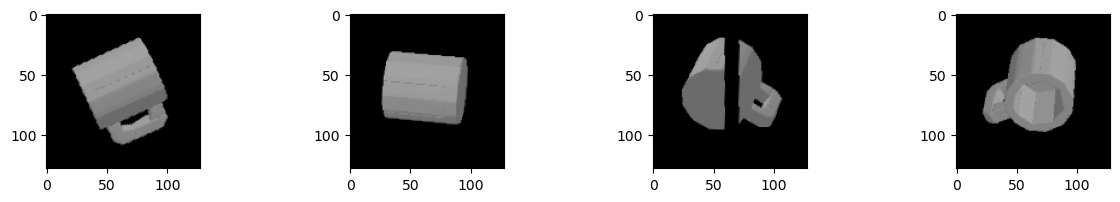

7 success!
8 trial:  1


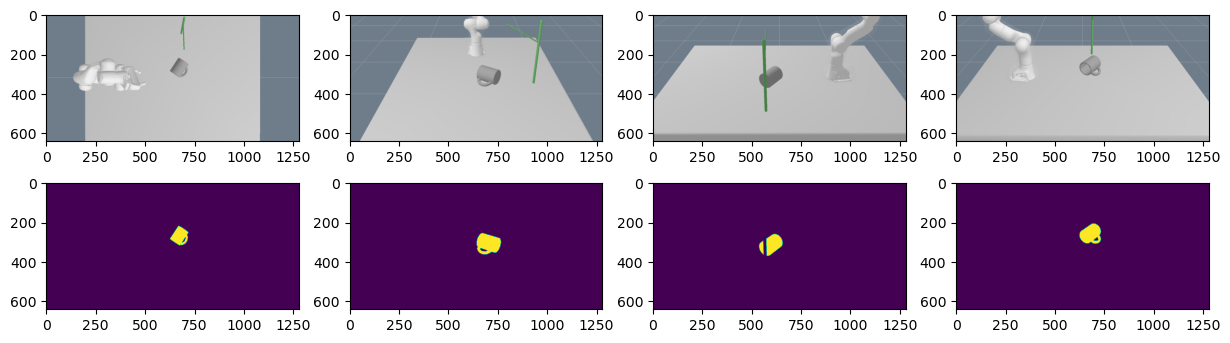

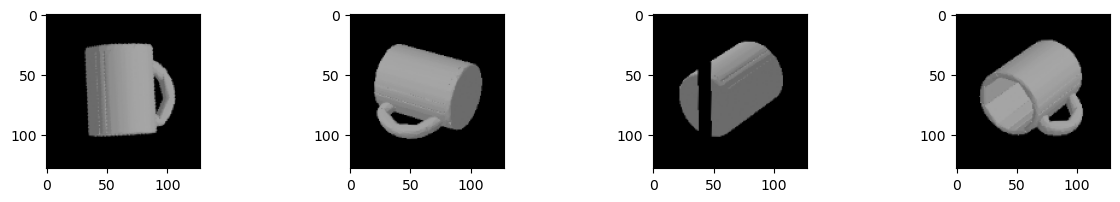

8 success!
9 trial:  1


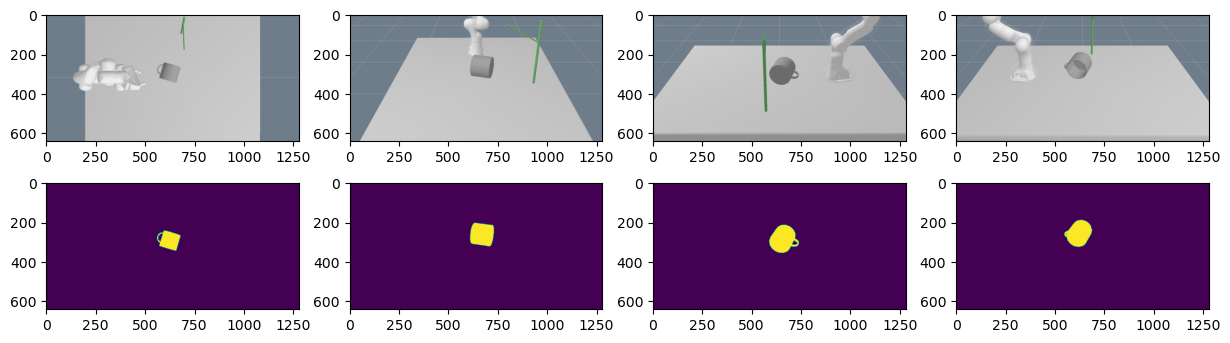

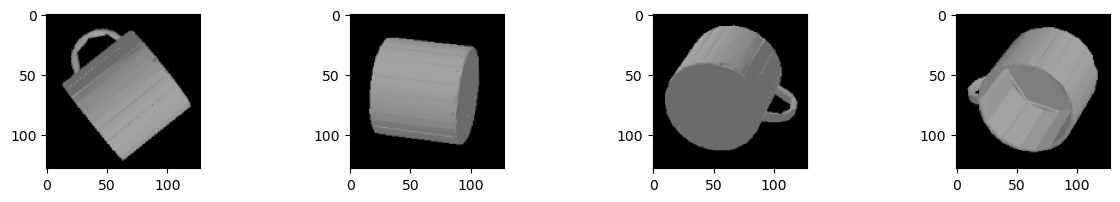

9 success!


In [4]:
# N=1
mug_inds = np.zeros(N)
mug_poses = np.zeros((N,7))
trajs = np.zeros((N,80,7))
traj_lengths = np.zeros(N)
successes = np.zeros(N)
num_restarts = np.zeros(N)

for i, filename in enumerate(test_list):
    mug_ind = sorted(os.listdir('../dataGeneration_vF/data/meshes_coll')).index(filename)
    
    while True:
        mug_pos = np.random.randn(3)*.1
        mug_pos[2] = 1.2
        mug_quat = np.random.randn(4)
        mug_pose = np.hstack([mug_pos, mug_quat/np.linalg.norm(mug_quat)])
        S = Simulation("world.g", [mug_ind], [mug_pose], sort=True, verbose=1, addImp=True)
        if S.getMugPosition(mug_ind)[0] < 0.2:
            break

    C = Configuration("world.g", exp_name='PIFO_best', mug_inds=[mug_ind], view=False)
    num_failures = 0
    failed = False
    traj_tmp = np.empty((0,7))

    while True:
        while True:
            print(i, 'trial: ', num_failures+1)
            C.setJointState(S.get_q())
            out = S.takePicture([mug_ind])
            C.updatePIFO([mug_ind], *out[2:])
            Skeleton = [["grasp", "", mug_ind], 
                        ["hang", "", mug_ind]]
            traj, komo = C.solveKOMO(Skeleton, verbose=1)
            S.executeTrajectory(traj[:10])
            traj_tmp = np.concatenate([traj_tmp, traj[:10]], axis=0)
            grasped = S.closeGripper(mug_ind)
            if grasped:
                break
            S.openGripper()
            S.goingBack(1.)
            num_failures += 1
            if num_failures > 3:
                failed = True
                print(i, 'failed!')
                break

        if failed: break
        S.executeTrajectory(traj[10:])
        traj_tmp = np.concatenate([traj_tmp, traj[10:]], axis=0)
        S.openGripper()
        S.stepNone(.3)
        S.goingBack(1.)
        S.stepNone(2.)
        if S.isHung(mug_ind):
            print(i, 'success!')
            break
        else:
            num_failures += 1
            if num_failures > 3:
                print(i, 'failed!')
                failed = True
                break
                
    mug_inds[i] = mug_ind 
    mug_poses[i] = mug_pose
    traj_lengths[i] = traj_tmp.shape[0]
    trajs[i,:traj_tmp.shape[0]] = traj_tmp
    successes[i] = not failed
    num_restarts[i] = num_failures
        
with h5py.File('eval/LGP/test_new.hdf5', 'w') as f:
    f.create_dataset("mug_inds", data=mug_inds)
    f.create_dataset("mug_poses", data=mug_poses)
    f.create_dataset("trajs", data=trajs)
    f.create_dataset("traj_lengths", data=traj_lengths)
    f.create_dataset("successes", data=successes)
    f.create_dataset("num_restarts", data=num_restarts)
    

In [43]:
from dcv.simulation_utils import *
with h5py.File('eval/LGP/train2.hdf5', 'r') as f:
    mug_inds, mug_poses, trajs, traj_lengths = f['mug_inds'][:], f['mug_poses'][:], f['trajs'][:], f['traj_lengths'][:]
    successes, num_restarts = f['successes'][:], f['num_restarts'][:]
print(successes.sum(), (num_restarts==0).sum())

9.0 5
